<a href="https://colab.research.google.com/github/gandharvbakshi/AI-and-ML-Hackathons/blob/main/Analytics_Vidhya_Gender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
print("Tensorflow version", tf.__version__)
from tensorflow import keras
print("Keras version", keras.__version__)
import matplotlib.pyplot as plt
from functools import partial
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

np.random.seed(42) 
tf.random.set_seed(42)

import os
import pandas as pd

import cv2 
import warnings
warnings.filterwarnings('ignore')

Tensorflow version 2.6.0
Keras version 2.6.0


In [5]:
dataDir = "/content/drive/MyDrive/AI ML Projects/AB Course/Gender detection"
trainDataRaw = pd.read_csv("/content/drive/MyDrive/AI ML Projects/AB Course/Gender detection/train.csv")
testDataRaw = pd.read_csv("/content/drive/MyDrive/AI ML Projects/AB Course/Gender detection/test_fkwGUNG.csv")


In [5]:
trainDataRaw.head(5)

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
imagePath = os.path.join(dataDir, "images")
fsa = []  
X = [] 
X_scaled = []
X_scaled = np.array(X_scaled)
y = [] 
i = 0

for img in trainDataRaw["image_names"].tolist():
  if (i % 1000 == 0):
    print(i, "th image done")
  img_array = cv2.imread(os.path.join(imagePath,img ))
  #fsa.append(img_array)
  i = i + 1
  #new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
  #X.append(img_array)
  img_array = cv2.normalize(img_array, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  X_scaled = np.append(X_scaled, img_array) #.append()
  y.append(trainDataRaw.loc[trainDataRaw["image_names"]==img, 'class'])
  #plt.imshow(img_array)
  #plt.show()
  #break
#X = np.array(X)
#X_scaled = np.array(X_scaled)
y = np.array(y)  

0 th image done
1000 th image done
2000 th image done
3000 th image done
4000 th image done
5000 th image done
6000 th image done
7000 th image done
8000 th image done


In [ ]:
i = 0
X_test = []
X_test_scaled = []
X_test_scaled = np.array(X_test_scaled)

for img in testDataRaw["image_names"].tolist():
  if (i % 1000 == 0):
    print(i, "th image done")
  img_array = cv2.imread(os.path.join(imagePath,img ))
  #fsa.append(img_array)
  i = i + 1
  #new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
  #X_test.append(img_array)
  #X_test_scaled.append(img_array/ 255.0)
  img_array = cv2.normalize(img_array, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  X_test_scaled = np.append(X_test_scaled, img_array)
  #plt.imshow(img_array)
  #plt.show()
  #break
#X_test = np.array(X_test)


224.0 224.0 3.0


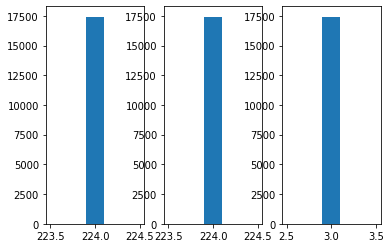

In [8]:
a = []
b = []
c = []
for i in range(0, len(fsa)):
  a.append(fsa[i].shape[0])
  b.append(fsa[i].shape[1])
  c.append(fsa[i].shape[2])
len(a)
print(np.median(a), np.median(b), np.median(c))
plt.subplot(1,3,1)
plt.hist(a, bins=5)
plt.subplot(1,3,2)
plt.hist(b, bins=5)
plt.subplot(1,3,3)
plt.hist(c, bins=5)
plt.show()

In [6]:
from numpy import save

#print(X.shape, y.shape, X_test.shape)
#save(os.path.join(dataDir,'X_train.npy'), X)
#save(os.path.join(dataDir,'X_scaled_train.npy'), X_scaled)
#save(os.path.join(dataDir,'Y_train.npy'), y)
#save(os.path.join(dataDir,'X_test.npy'), X_test)
#save(os.path.join(dataDir,'X_scaled_test.npy'), X_test_scaled)

X = np.load(os.path.join(dataDir,'X_train.npy'))
#X_scaled = np.load(os.path.join(dataDir,'X_scaled_train.npy'))
y = np.load(os.path.join(dataDir,'Y_train.npy'))
X_test = np.load(os.path.join(dataDir,'X_test.npy'))
#X_test_scaled = np.load(os.path.join(dataDir,'X_scaled_test.npy'))

In [7]:
print(X.shape, y.shape, X_test.shape)

(12196, 224, 224, 3) (12196, 1) (5227, 224, 224, 3)


In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

#from keras.applications.resnet50 import ResNet50
#from keras.applications.resnet50 import preprocess_input
#from keras.applications.resnet50 import decode_predictions

from keras.callbacks import ModelCheckpoint

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import efficientnet.keras as efn
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def VGG16_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def Inception_model():
  base_model = InceptionV3(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def Inception_trainable_model():
  base_model = InceptionV3(include_top=False, input_shape=(224, 224, 3))
  #base_model.trainable = True
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model


def VGG16_trainable_true_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  #base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def VGG16_slow_learn_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.000001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def VGG16_fast_learn_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.0001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def VGG16_dropout_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def VGG16_deeper_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def VGG16_deeper_dropout_model():
  base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def ResNet50_model():
  base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = False
  model = keras.models.Sequential([base_model,
                                  keras.layers.GlobalAveragePooling2D(),
                                  #keras.layers.Flatten(),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.Dense(1024, activation='relu'),
                                  #keras.layers.Dropout(0.2),
                                  keras.layers.Dense(units=1, activation='sigmoid')                                     
                                  ])
  base_learning_rate = 0.00001
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])  
  return model

def variable_model(FILTERS = 64,KERNEL_SIZE = 7):
  # create model
  DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=KERNEL_SIZE, activation='relu', padding="SAME")
  model = keras.models.Sequential([
    DefaultConv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, input_shape=[224, 224, 3]), 
    keras.layers.MaxPooling2D(pool_size=2), 
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation='sigmoid')
])               
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])    
  return model

def old_model():
  # create model
  DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")
  model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]), 
    keras.layers.MaxPooling2D(pool_size=2), 
    DefaultConv2D(filters=128),  
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation='sigmoid')
])               
  model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])    
  return model



In [11]:
#X = X.astype('float64')
#X_test = X_test.astype('float64')
#X /= 255
#X_test /= 255
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(x_train), "train +", len(x_test), "test")


9756 train + 2440 test


In [20]:
from sklearn.metrics import accuracy_score
def predict_class(n):
  if n > 0.5:
    return 1
  else:
    return 0

batch_size = 32
FILTERS = [32, 64, 128]
BATCH_SIZE = [32, 64, 128]
KERNELS = [3,5,7, 9] 

Model_Table = []
'''for filter in FILTERS:
  for kernel in KERNELS:'''
for bs in BATCH_SIZE:
  print(bs)
  model = variable_model(32, 3)
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
  trial = model.fit(x_train,y_train,  epochs=131, batch_size=bs, validation_data = (x_test, y_test), callbacks=[callback], verbose=0) #                      
  y_bm_keras = model.predict(x_test)
  y_bm_keras = list(map(predict_class, y_bm_keras))
  score = accuracy_score(y_test, y_bm_keras)
  print(bs, score)
  Model_Table.append([ filter, kernel , score])


32
32 0.6327868852459017
64
64 0.8135245901639344
128
128 0.5299180327868852


In [12]:
from sklearn.metrics import accuracy_score
batch_size = 32

# defining the path to save the model
best_model_path = os.path.join(dataDir, 'best_model.hdf5')

model = Inception_trainable_model() #variable_model(32, 3) #old_model()
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
    ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose = 1, save_best_only = True, mode='max')
]

#new_x_train = x_train/ 255.0
#new_x_test = x_test / 255.0

#new_x_train = preprocess_input(x_train)
#new_x_test = preprocess_input(x_test)

trial = model.fit(x_train,y_train,  epochs=131, validation_data = (x_test, y_test), callbacks=my_callbacks) #batch_size=batch_size,                      
def predict_class(n):
  if n > 0.5:
    return 1
  else:
    return 0
model.load_weights(best_model_path)
y_bm_keras = model.predict(x_test)
#y_bm_keras = model.predict_classes(x_test)
#results = model.evaluate(, y_test)
y_bm_keras = list(map(predict_class, y_bm_keras))
print(accuracy_score(y_test, y_bm_keras))


87924736/87910968 [==============================] - 2s 0us/step
Epoch 1/131
305/305 [==============================] - 84s 178ms/step - loss: 0.3459 - accuracy: 0.8404 - val_loss: 0.4006 - val_accuracy: 0.8803

Epoch 00001: val_accuracy improved from -inf to 0.88033, saving model to /content/drive/MyDrive/AI ML Projects/AB Course/Gender detection/best_model.hdf5
Epoch 2/131
305/305 [==============================] - 52s 170ms/step - loss: 0.1725 - accuracy: 0.9298 - val_loss: 0.1958 - val_accuracy: 0.9193

Epoch 00002: val_accuracy improved from 0.88033 to 0.91926, saving model to /content/drive/MyDrive/AI ML Projects/AB Course/Gender detection/best_model.hdf5
Epoch 3/131
305/305 [==============================] - 52s 170ms/step - loss: 0.1342 - accuracy: 0.9456 - val_loss: 0.2421 - val_accuracy: 0.8984

Epoch 00003: val_accuracy did not improve from 0.91926
Epoch 4/131
305/305 [==============================] - 52s 170ms/step - loss: 0.1064 - accuracy: 0.9601 - val_loss: 0.1767 - val

In [13]:
y_bm_final = model.predict(X_test)
y_bm_final = list(map(predict_class, y_bm_final))
testDataSub = testDataRaw.copy()
testDataSub['class'] = y_bm_final
testDataSub.to_csv(os.path.join(dataDir, 'submission6 Inception V3 trainable with model checkpoint.csv'), index = False)